In [2]:
!pip install torchsummary tensorboardX

  Obtaining dependency information for tensorboardX from https://files.pythonhosted.org/packages/44/71/f3e7c9b2ab67e28c572ab4e9d5fa3499e0d252650f96d8a3a03e26677f53/tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 101.7/101.7 kB 5.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
"""
Simple Neural Network for Iris Classification using PyTorch.
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorboardX import SummaryWriter

# Constants
LEARNING_RATE = 0.001
NUM_EPOCHS = 1000

# Load Iris dataset and split it into features (X) and labels (y)
iris_dataset = load_iris()
features, labels = iris_dataset.data, iris_dataset.target

# Convert data to PyTorch tensors
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.int64)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_model(model, criterion, optimizer, train_loader, num_epochs=NUM_EPOCHS):
    """Train the neural network model."""
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        writer.add_scalar('Loss', loss.item(), epoch)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

def test_model(model, test_loader):
    """Test the trained model."""
    model.eval()
    
    # resource management with `with` context manager: 
    with torch.no_grad():
        correct_predictions = 0
        total_samples = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == targets).sum().item()
            total_samples += targets.size(0)
        
        accuracy = correct_predictions / total_samples
        print('Accuracy:', accuracy)
        return accuracy

# DataLoaders
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model initialization
input_size = features.shape[1]

hidden_size = 64
num_classes = len(torch.unique(labels))
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# TensorBoardX setup
with SummaryWriter() as writer:
    def register_hooks(module):
        def hook_fn(module, input, output):
            writer.add_histogram(f'{module.__class__.__name__}/Activations', output, global_step=epoch)

        if not isinstance(module, nn.Sequential) and not isinstance(module, nn.ModuleList) and not (module == model):
            hooks.append(module.register_forward_hook(hook_fn))

    hooks = []
    model.apply(register_hooks)

    # Train the model
    for epoch in range(NUM_EPOCHS):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        writer.add_scalar('Loss', loss.item(), epoch)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

    # Test the model
    model.eval()
    with torch.no_grad():
        correct_predictions = 0
        total_samples = 0
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == targets).sum().item()
            total_samples += targets.size(0)

        accuracy = correct_predictions / total_samples
        print('Accuracy:', accuracy)

    # Clean up hooks
    for hook in hooks:
        hook.remove()

    print('Training and evaluation completed.')


Epoch [10/1000], Loss: 0.8088
Epoch [20/1000], Loss: 0.5568
Epoch [30/1000], Loss: 0.4541
Epoch [40/1000], Loss: 0.4486
Epoch [50/1000], Loss: 0.3275
Epoch [60/1000], Loss: 0.2894
Epoch [70/1000], Loss: 0.1985
Epoch [80/1000], Loss: 0.2651
Epoch [90/1000], Loss: 0.2438
Epoch [100/1000], Loss: 0.1806
Epoch [110/1000], Loss: 0.1466
Epoch [120/1000], Loss: 0.1727
Epoch [130/1000], Loss: 0.1740
Epoch [140/1000], Loss: 0.2125
Epoch [150/1000], Loss: 0.1312
Epoch [160/1000], Loss: 0.0852
Epoch [170/1000], Loss: 0.2125
Epoch [180/1000], Loss: 0.0767
Epoch [190/1000], Loss: 0.0653
Epoch [200/1000], Loss: 0.0673
Epoch [210/1000], Loss: 0.1652
Epoch [220/1000], Loss: 0.1230
Epoch [230/1000], Loss: 0.0876
Epoch [240/1000], Loss: 0.1376
Epoch [250/1000], Loss: 0.1147
Epoch [260/1000], Loss: 0.0850
Epoch [270/1000], Loss: 0.0871
Epoch [280/1000], Loss: 0.1243
Epoch [290/1000], Loss: 0.1413
Epoch [300/1000], Loss: 0.0795
Epoch [310/1000], Loss: 0.0173
Epoch [320/1000], Loss: 0.0410
Epoch [330/1000],

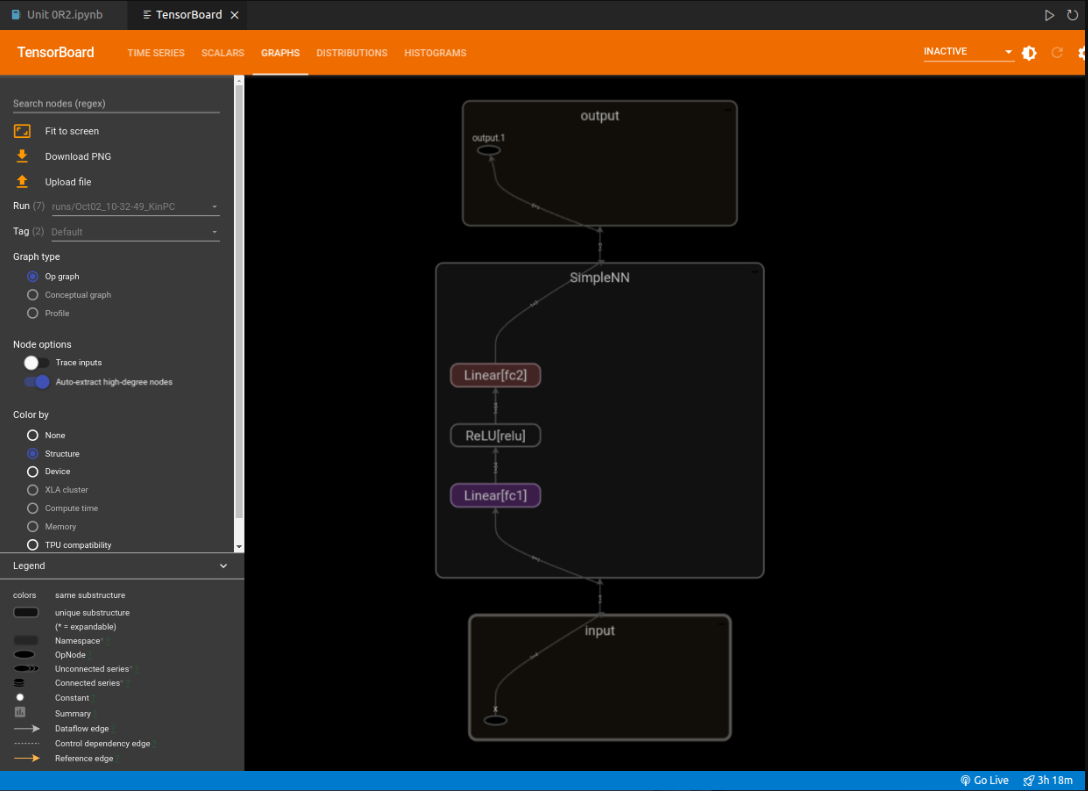